In [1]:
from shoestring.design import Design

import warnings

from Bio import BiopythonParserWarning
warnings.simplefilter('ignore', BiopythonParserWarning)

In [2]:
from shoestring.design import Design
from pyblast.utils import load_fasta_glob, load_genbank_glob, make_circular, make_linear
from shoestring.cost import SpanCost
from os.path import join

span_cost = SpanCost()


here = 'tests'
query = '*.gb'
paths = {
        'primers': join(here, "data/test_data/primers/primers.fasta"),
        'templates': join(here, "data/test_data/genbank/templates/*.gb"),
        'queries': join(
            'tests', "data/test_data/genbank/designs/*.gb"
        ),
    }
primers = make_linear(load_fasta_glob(paths["primers"]))
templates = load_genbank_glob(paths["templates"])

query_path = join(here, 'data/test_data/genbank/designs', query)
queries = make_circular(load_genbank_glob(query_path))

/Users/justinvrana/Documents/GitHub/shoestringDNA/shoestring/cost/__init__.py:132: RuntimeWarning: divide by zero encountered in true_divide
  self.cost_matrix = (m * CostParams.material + t * CostParams.time) * 1.0 / e


In [3]:
from shoestring.design import LibraryDesign

design = LibraryDesign(span_cost=span_cost)

design.add_materials(primers=primers, templates=templates, queries=queries)

design.compile()

edges = design._edges

Found previous installation at "/Users/justinvrana/anaconda3/lib/python3.7/site-packages/pyblast/blast_bin/bin/ncbi-blast-2.9.0+/bin"
CMD: makeblastdb -dbtype nucl -title 12820a79-07d9-4bd6-9c1e-2797b4fa7c2a -out /var/folders/fr/yc9x0z2s39lcj4f9d95wvrpr0000gn/T/tmpo7ogmhu9/12820a79-07d9-4bd6-9c1e-2797b4fa7c2a -in /var/folders/fr/yc9x0z2s39lcj4f9d95wvrpr0000gn/T/tmpmx0mybsl.fasta
CMD: blastn -db /var/folders/fr/yc9x0z2s39lcj4f9d95wvrpr0000gn/T/tmpo7ogmhu9/12820a79-07d9-4bd6-9c1e-2797b4fa7c2a -out /var/folders/fr/yc9x0z2s39lcj4f9d95wvrpr0000gn/T/tmpo7ogmhu9/tmpac1djtq8 -query /var/folders/fr/yc9x0z2s39lcj4f9d95wvrpr0000gn/T/tmp1u_2igjh.fasta -outfmt "7 qacc sacc score evalue bitscore length nident gapopen gaps qlen qstart qend slen sstart send sstrand qseq sseq"
CMD: makeblastdb -dbtype nucl -title 5fc887b4-4588-40cd-a6f0-ed9fee034bb7 -out /var/folders/fr/yc9x0z2s39lcj4f9d95wvrpr0000gn/T/tmpl1mx3o6z/5fc887b4-4588-40cd-a6f0-ed9fee034bb7 -in /var/folders/fr/yc9x0z2s39lcj4f9d95wvrpr0000gn/T

/Users/justinvrana/anaconda3/lib/python3.7/site-packages/pyblast/blast/blast.py:605: UserWarning: A circular query 8b25c571-a84c-4648-b0e1-516c6b76809e overlapped the origins
  x, origin_key
/Users/justinvrana/anaconda3/lib/python3.7/site-packages/pyblast/blast/blast.py:605: UserWarning: A circular subject 8b25c571-a84c-4648-b0e1-516c6b76809e overlapped the origins
  x, origin_key
/Users/justinvrana/anaconda3/lib/python3.7/site-packages/pyblast/blast/blast.py:605: UserWarning: A circular query 6b20ff2d-a314-4e4b-83d0-58d68b485ee2 overlapped the origins
  x, origin_key
/Users/justinvrana/anaconda3/lib/python3.7/site-packages/pyblast/blast/blast.py:605: UserWarning: A circular subject 6b20ff2d-a314-4e4b-83d0-58d68b485ee2 overlapped the origins
  x, origin_key
/Users/justinvrana/anaconda3/lib/python3.7/site-packages/pyblast/blast/blast.py:605: UserWarning: A circular query c8765f5f-dc2a-4070-a1b3-0f9031bc2193 overlapped the origins
  x, origin_key
/Users/justinvrana/anaconda3/lib/python3.

In [7]:
from shoestring import Constants

for container in design.container_list():
    groups = container.get_groups_by_types(Constants.SHARED_FRAGMENT)
    print(groups)

[<shoestring.AlignmentGroup object at 0x1a1c412488>, <shoestring.AlignmentGroup object at 0x1a1c412548>, <shoestring.AlignmentGroup object at 0x1a1c412648>, <shoestring.AlignmentGroup object at 0x1a1c412708>, <shoestring.AlignmentGroup object at 0x1a1c412808>, <shoestring.AlignmentGroup object at 0x1a1c4128c8>, <shoestring.AlignmentGroup object at 0x1a1c412908>, <shoestring.AlignmentGroup object at 0x1a1c412948>, <shoestring.AlignmentGroup object at 0x1a1c412988>, <shoestring.AlignmentGroup object at 0x1a1c412888>, <shoestring.AlignmentGroup object at 0x1a1c412a48>]
[<shoestring.AlignmentGroup object at 0x1a1c3164c8>, <shoestring.AlignmentGroup object at 0x1a1c316648>, <shoestring.AlignmentGroup object at 0x1a1c316708>, <shoestring.AlignmentGroup object at 0x1a1c316748>, <shoestring.AlignmentGroup object at 0x1a1c3167c8>, <shoestring.AlignmentGroup object at 0x1a1c316888>, <shoestring.AlignmentGroup object at 0x1a1c3168c8>, <shoestring.AlignmentGroup object at 0x1a1c316408>, <shoestrin

In [ ]:
container.get_groups_by_types

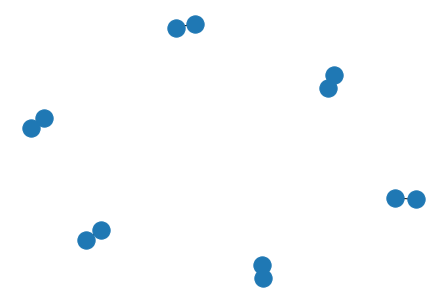

In [24]:
import networkx as nx
from itertools import product

def find(a, b, alignments):
    for align in alignments:
        if a == align.query_region.a and b == align.query_region.b:
            yield align

            
G = nx.MultiGraph()

repeats = []

for r in design.shared_alignments:
    qk = r['query']['origin_key']
    sk = r['subject']['origin_key']
    if qk == sk:
        repeats.append((qk, r['query']['start'], r['query']['end']))

non_repeat_interactions = {}

for r in design.shared_alignments:
    qk = r['query']['origin_key']
    sk = r['subject']['origin_key']
    
    if qk != sk:
        n1 = (sk, r['subject']['start'], r['subject']['end'])
        n2 = (qk, r['query']['start'], r['query']['end'])
        if n1 not in repeats and n2 not in repeats:
            query = design.container_factory.seqdb[qk]
            subject = design.container_factory.seqdb[sk]
            
            s1, e1 = r['query']['start'], r['query']['end']
            s2, e2 = r['subject']['start'], r['subject']['end']
            
            non_repeat_interactions.setdefault(n1, set()).add(n2)
            non_repeat_interactions.setdefault(n2, set()).add(n1)

G = nx.Graph()
for k, v in non_repeat_interactions.items():
    for _v in v:
        G.add_edge(k, _v)
        
%matplotlib inline

nx.draw(G)
#             print(r['subject']['start'], r['subject']['end'])
#             print(query.name, subject.name)

In [33]:
from shoestring import AlignmentContainer

AlignmentContainer()

shoestring.AlignmentContainer

In [6]:
queries

[SeqRecord(seq=Seq('AGTAATAGTGACTATGTTGCTCCTTTTACGCTATGTGGATACGCTGCTTTAATG...TCA', IUPACAmbiguousDNA()), id='pLKO-pEF1a-FRT-tdTomato', name='pLKO-pEF1a-FRT-tdTomato', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('TCGCGCGTTTCGGTGATGACGGTGAAAACCTCTGACACATGCAGCTCCCGGAGA...GTC', IUPACAmbiguousDNA()), id='pMODKan-HO-pACT1-Z4-', name='pMODKan-HO-pACT1-Z4-', description='', dbxrefs=[]),
 SeqRecord(seq=Seq('GCCGATACGAAGGTTTTCTCCAGCGAAGGTCGGGCAGGAAGAGGGCCTATTTCC...TGC', IUPACAmbiguousDNA()), id='pINS-01-hU6-SV40.NT1-op', name='pINS-01-hU6-SV40.NT1-op', description='', dbxrefs=[])]

In [10]:
for i in range(200):
    for g in design.graphs.values():
        nodelist = list(g.nodes())
        nx.floyd_warshall_numpy(g, nodelist=nodelist, weight='weight')

In [12]:
design = Design(span_cost=span_cost)

design.add_materials(primers=primers, templates=templates, queries=queries)

design.compile()
design._edges

CMD: makeblastdb -dbtype nucl -title 3d8bacc7-bade-4027-b482-d960228270db -out /var/folders/hl/pff9rjpd5jx73ylds97m2hww0000gn/T/tmpxs_z4hlp/3d8bacc7-bade-4027-b482-d960228270db -in /var/folders/hl/pff9rjpd5jx73ylds97m2hww0000gn/T/tmpxeb9j68w.fasta
CMD: blastn -db /var/folders/hl/pff9rjpd5jx73ylds97m2hww0000gn/T/tmpxs_z4hlp/3d8bacc7-bade-4027-b482-d960228270db -out /var/folders/hl/pff9rjpd5jx73ylds97m2hww0000gn/T/tmpxs_z4hlp/tmpigw0bmmw -query /var/folders/hl/pff9rjpd5jx73ylds97m2hww0000gn/T/tmpql37_lej.fasta -outfmt "7 qacc sacc score evalue bitscore length nident gapopen gaps qlen qstart qend slen sstart send sstrand qseq sseq"
CMD: makeblastdb -dbtype nucl -title 084292af-5ab1-4f8f-8738-c79e4c8a1fac -out /var/folders/hl/pff9rjpd5jx73ylds97m2hww0000gn/T/tmpzicbbq87/084292af-5ab1-4f8f-8738-c79e4c8a1fac -in /var/folders/hl/pff9rjpd5jx73ylds97m2hww0000gn/T/tmptupf1p9o.fasta
CMD: blastn -db /var/folders/hl/pff9rjpd5jx73ylds97m2hww0000gn/T/tmpzicbbq87/084292af-5ab1-4f8f-8738-c79e4c8a1fac -

AttributeError: 'Design' object has no attribute '_edges'